In [185]:
import pandas as pd
import matplotlib.pyplot as plt

### Process Files into Dataframes

In [186]:
'''
For Graphs, what we need to do is graph the following things:
- Number of privately owned vs state-owned electronics companies
- Debt vs Equity Financing for Electronics companies
- Number of privately owned vs state-owned real estate companies
- Real Estate financing over time
- Comparing number of firms in real estate vs electronics
'''

df_e = pd.read_excel("excel_data/china_electronics_financial_data.xlsx")

df_re = pd.read_excel("excel_data/china_real_estate_financial_data.xlsx")

#### Number of enterprises in electronics vs real estate

In [187]:
df_e['year'] = df_e['year'].astype(str)
df_e_yr = df_e[df_e['year'].str.contains(r'-12-', na=False)].copy()
df_e_yr['year'] = df_e_yr['year'].str.slice(start=0, stop=4)
df_e_yr['year'] = pd.to_numeric(df_e_yr['year'])

df_e_num = df_e_yr[["year", "CN: Electronic Industry: No of Enterprise"]].copy()
df_e_num.dropna(inplace=True)

df_re['year'] = df_re['year'].astype(str)
df_re_yr = df_re[df_re['year'].str.contains(r'-12-', na=False)].copy()
df_re_yr['year'] = df_re_yr['year'].str.slice(start=0, stop=4)
df_re_yr['year'] = pd.to_numeric(df_re_yr['year'])

df_re_num = df_re_yr[["year", "CN: Real Estate: No of Enterprise"]].copy()
df_re_num.dropna(inplace=True)

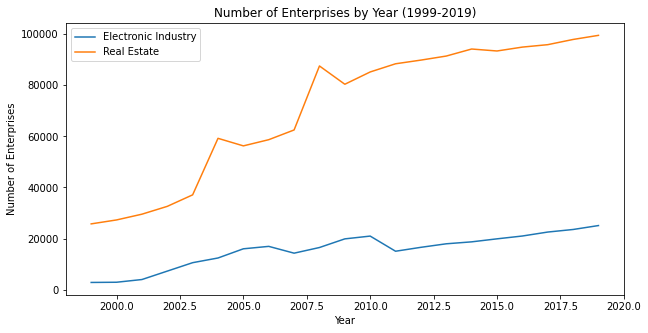

In [188]:
# Filter the DataFrames to include only the years from 1999 to 2019
df_e_num_filtered = df_e_num[(df_e_num['year'] >= 1999) & (df_e_num['year'] <= 2019)]
df_re_num_filtered = df_re_num[(df_re_num['year'] >= 1999) & (df_re_num['year'] <= 2019)]

# Plotting the line graph
plt.figure(figsize=(10, 5))

# Plotting Electronic Industry data
plt.plot(df_e_num_filtered['year'], df_e_num_filtered['CN: Electronic Industry: No of Enterprise'], label='Electronic Industry')

# Plotting Real Estate data
plt.plot(df_re_num_filtered['year'], df_re_num_filtered['CN: Real Estate: No of Enterprise'], label='Real Estate')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Enterprises')
plt.title('Number of Enterprises by Year (1999-2019)')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

#### Shareholders Equity in Each Industry

In [189]:
df_e_se = df_e_yr[["year","CN: EI: Asset", "CN: EI: Liability"]].copy()
df_e_se.dropna(inplace=True)
df_e_se['shareholders equity'] = df_e_se['CN: EI: Asset'] - df_e_se['CN: EI: Liability']
# print(df_e_se)

df_re_se = df_re_yr[["year","CN: Real Estate: Shareholder Equity"]].copy()
df_re_se.dropna(inplace=True)
# df_re_alre['shareholders equity'] = df_e_alre['CN: Real Estate: Total Asset'] - df_e_alre['CN: EI: Liability']
# print(df_re_se)

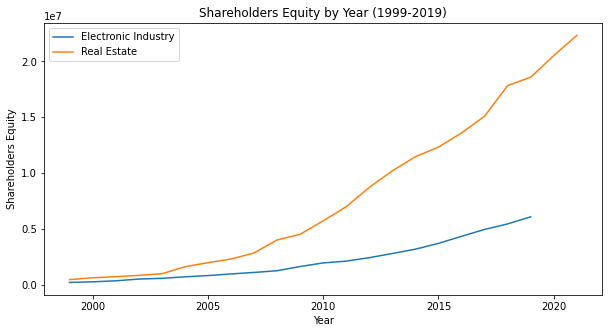

In [190]:
df_e_se_filtered = df_e_se[(df_e_se['year'] >= 1999)].copy() #  & (df_e_se['year'] <= 2019)
df_re_se_filtered = df_re_se[(df_re_se['year'] >= 1999)].copy() # & (df_re_se['year'] <= 2019)

# Plotting the line graph
plt.figure(figsize=(10, 5))

# Plotting Electronic Industry data
plt.plot(df_e_se_filtered['year'], df_e_se_filtered['shareholders equity'], label='Electronic Industry')

# Plotting Real Estate data
plt.plot(df_re_se_filtered['year'], df_re_se_filtered["CN: Real Estate: Shareholder Equity"], label='Real Estate')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Shareholders Equity')
plt.title('Shareholders Equity by Year (1999-2019)')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

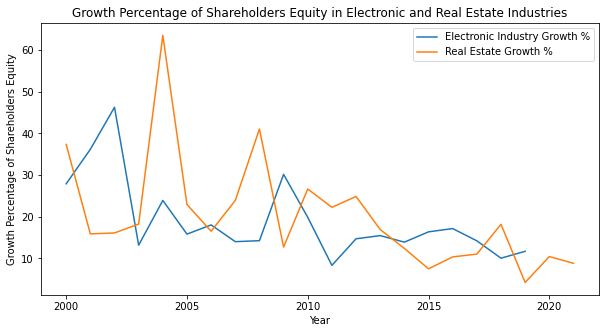

In [191]:
df_e_se_filtered['growth'] = df_e_se_filtered['shareholders equity'].pct_change() * 100
df_re_se_filtered['growth'] = df_re_se_filtered["CN: Real Estate: Shareholder Equity"].pct_change() * 100

# Plotting the line graph
plt.figure(figsize=(10, 5))

# Plotting growth for Electronic Industry
plt.plot(df_e_se_filtered['year'], df_e_se_filtered['growth'], label='Electronic Industry Growth %')

# Plotting growth for Real Estate
plt.plot(df_re_se_filtered['year'], df_re_se_filtered['growth'], label='Real Estate Growth %')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Growth Percentage of Shareholders Equity')
plt.title('Growth Percentage of Shareholders Equity in Electronic and Real Estate Industries')

# Adding a legend
plt.legend()

# Display the plot
plt.show()